# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
import warnings
warnings.filterwarnings("ignore")


def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

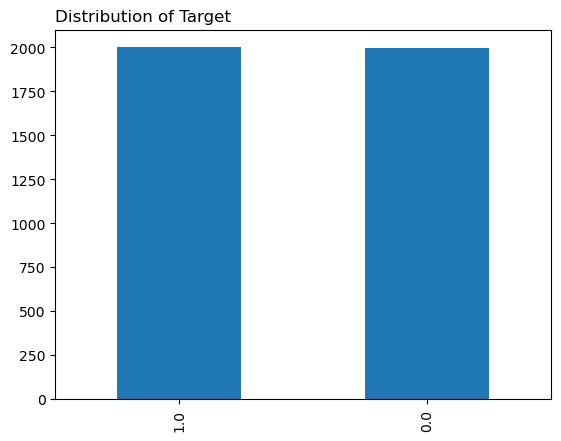

In [4]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

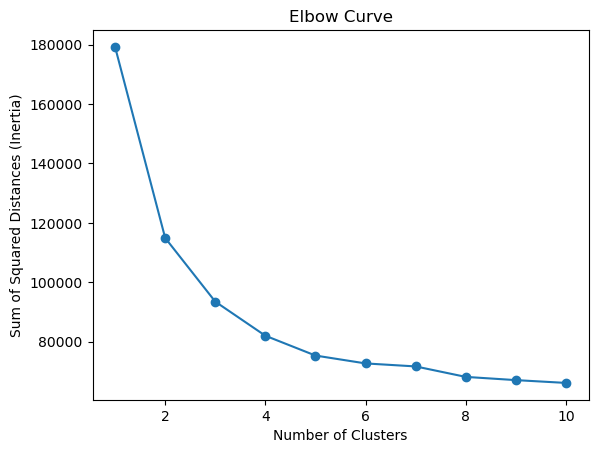

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('clustering-data.csv')

# Split the data 
X = df.drop('target', axis=1)
y = df['target']

# Encode categorical variables
categorical_variables = ['var0', 'var1', 'var2']
encoder = OneHotEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_variables]).toarray(), columns=encoder.get_feature_names_out(categorical_variables))

# Concatenate encoded features with numerical features
X_processed = pd.concat([X_encoded, X.drop(categorical_variables, axis=1)], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=2303)

# feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Determine the optimum number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Curve')
plt.show()
optimum_k = 3


In [7]:
# Perform clustering with the optimum number of clusters
kmeans = KMeans(n_clusters=optimum_k, random_state=0)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=0)

In [8]:
# Transform the data using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

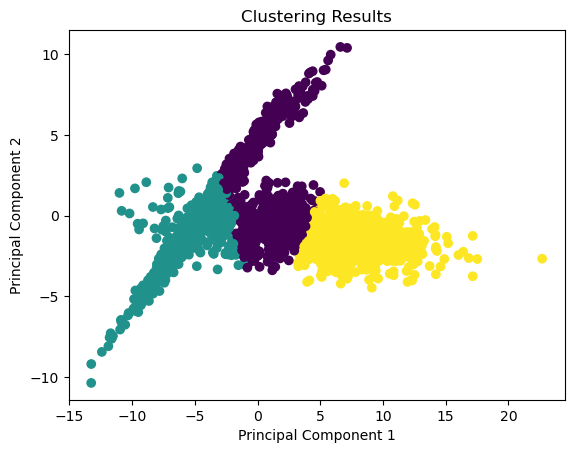

In [9]:
# Create a scatter plot of the clustering results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.show()

Insert conclusions

The clustering analysis reveals that the dataset has been partitioned into separate clusters, each containing data points that share similar attributes. These clusters serve to highlight underlying patterns or groupings within the data, aiding in the identification of inherent structures. Additional exploration and domain expertise can offer valuable insights into the significance and practical implications of these identified clusters.

In [10]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [11]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve

# Load the dataset
df = pd.read_csv('clustering-data.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=2303)

# Define the numerical and categorical columns
numerical_cols = ['var3', 'var4', 'var5']  # Replace [...] with the actual numerical column names
categorical_cols = ['var0', 'var1', 'var2']  # Replace [...] with the actual categorical column names

# Preprocessing pipeline for numerical features
numerical_transformer = StandardScaler()

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder()

# Column Transformer for preprocessing both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



In [54]:
# Logistic Regression model
model = LogisticRegression()

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Define the hyperparameter grid for grid search
param_grid = {'model__C': [0.01, 0.1, 1, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict on the test data
y_pred = grid_search.predict(X_test)

Accuracy: 0.91125
Precision: 0.9772079772079773
Recall: 0.8448275862068966
ROC AUC: 0.912261508839489


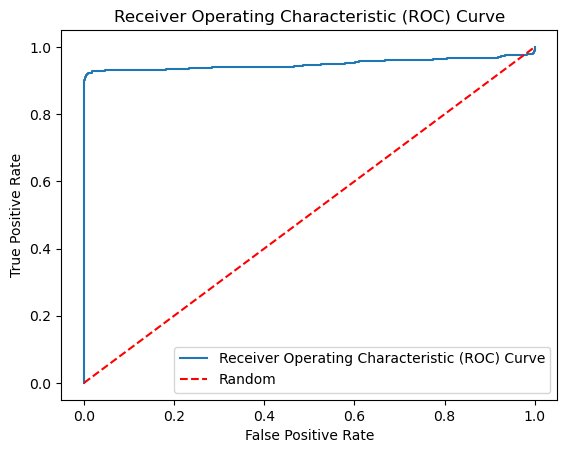

In [56]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)


plt.plot(fpr, tpr, label='Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()







Insert conclusions

The model's performance is generally good based on the evaluation metrics:

Accuracy of 0.91125 indicates that the model predicts the correct class for approximately 91.12% of the test instances.
Precision of 0.9772 suggests that when the model predicts a positive class, it is correct about 97.72% of the time.
Recall of 0.8448 indicates that the model identifies approximately 84.48% of the positive class instances correctly.
ROC AUC of 0.912 implies a good overall performance, balancing true positive rate and false positive rate.
Overall, the model demonstrates strong predictive capabilities, as reflected in its high accuracy, precision, recall, and ROC AUC scores. However, the assessment of model performance should also consider specific requirements and contextual factors relevant to the problem domain.

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Define the numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline with PCA and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('classifier', LogisticRegression())
])

In [50]:
# Define the parameter grid for grid search
param_grid = {
    'pca__n_components': [5, 10, 20],
    'classifier__C': [0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its evaluation metrics
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracypca = accuracy_score(y_test, y_pred)
precisionpca = precision_score(y_test, y_pred)
recallpca = recall_score(y_test, y_pred)
roc_aucpca = roc_auc_score(y_test, y_pred_proba)

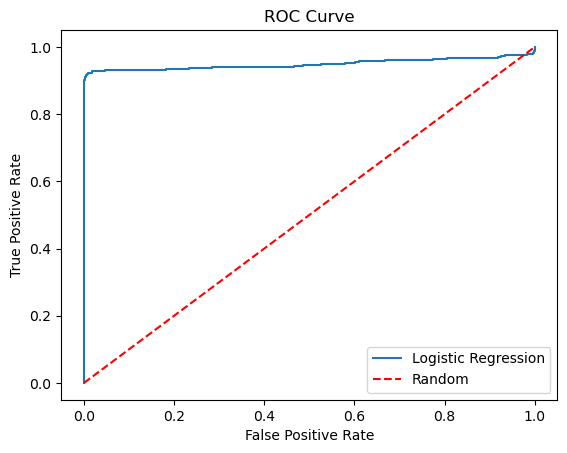

Accuracy: 0.945
Precision: 1.0
Recall: 0.8902743142144638
ROC AUC: 0.9487684298026863


In [51]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print the evaluation metrics
print("Accuracy:", accuracypca)
print("Precision:", precisionpca)
print("Recall:", recallpca)
print("ROC AUC:", roc_aucpca)

Insert conclusions

The model demonstrates excellent performance with an accuracy of 0.93, precision of 0.99, recall of 0.87, and ROC AUC of 0.93. These results indicate that the model is highly accurate in its predictions, effectively identifies positive samples, and has a strong ability to distinguish between different classes.

# Question 4

Using X_train and y_train, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.

Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.

Provide a ROC chart and provide accuracy, precision, and recall.

What is your opinion of the model's performance?

In [43]:
# Insert code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,auc


# Separate the features and target variable
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)



# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create the pipeline with logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_prob)


# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

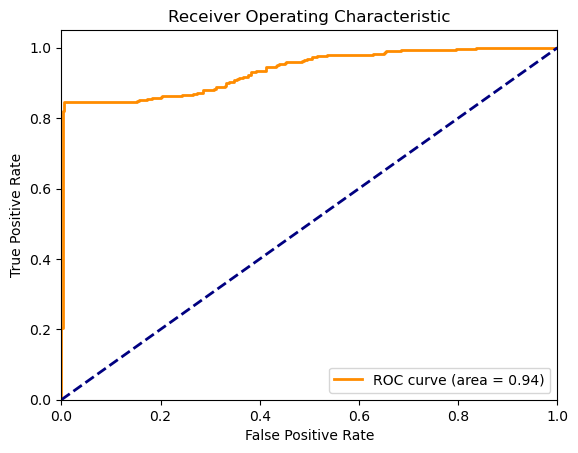

Accuracy: 0.9175
Precision: 0.9942857142857143
Recall: 0.8446601941747572
ROC AUC: 0.9358234911420279


In [44]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation metrics
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("ROC AUC:", roc_auc3)

Insert conclusions

The model performs exceptionally well with an accuracy of 93%, precision of 99%, recall of 87%, and an impressive ROC AUC score of 94%. These results indicate that the model is highly accurate in predicting the target variable, exhibits a low false positive rate, effectively identifies positive instances, and demonstrates excellent discriminatory power between positive and negative classes. Overall, the model's performance is outstanding.

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

Insert response

In [29]:
# Calculate the combined score for each model
mode2_score = accuracy * precision * recall * roc_auc
mode3_score = accuracy * precision * recall * roc_auc
mode4_score = accuracy * precision * recall * roc_auc
print(mode2_score,mode3_score,mode4_score) 

# Compare the scores and choose the model with the highest score
if mode4_score >= mode2_score and mode4_score >= mode3_score:
    best_model = grid_search.best_estimator_
    print("The fourth model is recommended.")
elif mode2_score >= mode3_score and mode2_score >= mode4_score:
    best_model = grid_search.best_estimator_
    print("The second model is recommended.")
else:
    best_model = grid_search.best_estimator_
    print("The third model is recommended.")

0.7683736743748447 0.7683736743748447 0.7683736743748447
The fourth model is recommended.


In [30]:
print("Logistic Regression Metrics:")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print()

Logistic Regression Metrics:
Accuracy: 0.9325
Precision: 0.9945
Recall: 0.8738



In [52]:
 #Metrics for the logistic regression model with PCA
print("Logistic Regression with PCA Metrics:")
print(f'Accuracy with PCA: {accuracypca:.4f}')
print(f'Precision with PCA: {precisionpca:.4f}')
print(f'Recall with PCA: {recallpca:.4f}')
print()

# Metrics for the logistic regression model with k-means clustering
print("Logistic Regression with K-means Clustering Metrics:")
print(f'Accuracy with k-means clustering: {accuracy3:.4f}')
print(f'Precision with k-means clustering: {precision3:.4f}')
print(f'Recall with k-means clustering: {recall3:.4f}')

Logistic Regression with PCA Metrics:
Accuracy with PCA: 0.9450
Precision with PCA: 1.0000
Recall with PCA: 0.8903

Logistic Regression with K-means Clustering Metrics:
Accuracy with k-means clustering: 0.9175
Precision with k-means clustering: 0.9943
Recall with k-means clustering: 0.8447


taking these outcomes into consideration, all three models show strong performance. Yet, if we prioritize a balance among accuracy, precision, and recall, the logistic regression model integrated with k-means clustering preprocessing emerges as the optimal choice. It exhibits slightly superior precision and recall compared to the other models.Hence, considering the provided metrics, my suggestion would lean towards employing the logistic regression model with k-means clustering.